Hier worden alle libraries geïmporteerd

In [19]:
# importing required libraries

import pandas as pd
from pandas import read_csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn import tree
import warnings
warnings.simplefilter("ignore")


Hier wordt alle data van de dataset opgehaald

In [20]:
# importing the dataset

df = pd.read_csv("./newdata/collectionfile.csv")


In [21]:
# checking what types of data are in the dataframe and how much ram they take up

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5048 non-null   int64  
 1   index            5048 non-null   int64  
 2   raceId           5048 non-null   int64  
 3   driverId         5048 non-null   int64  
 4   finnishPosition  5048 non-null   int64  
 5   laps             5048 non-null   int64  
 6   year             5048 non-null   int64  
 7   round            5048 non-null   int64  
 8   circuitId        5048 non-null   int64  
 9   grand_prix       5048 non-null   int64  
 10  nationality      5048 non-null   int64  
 11  constructor      5048 non-null   int64  
 12  positionQuali    5048 non-null   int64  
 13  driver_name      5048 non-null   int64  
 14  age              5048 non-null   float64
dtypes: float64(1), int64(14)
memory usage: 591.7 KB


Alle kollomen die in het dataframe staan worden hier geprint

In [22]:
# viewing the columns in the dataframe

df.columns


Index(['Unnamed: 0', 'index', 'raceId', 'driverId', 'finnishPosition', 'laps',
       'year', 'round', 'circuitId', 'grand_prix', 'nationality',
       'constructor', 'positionQuali', 'driver_name', 'age'],
      dtype='object')

Het definieren van de waarden van de decisiontree aan een variabele (model)

In [23]:
# defining the tree structure

model = tree.DecisionTreeRegressor(max_depth=5, random_state=1234)


Het definieren van de waarden die gebruikt worden om te voorspellen en de te voorspellen waarde

In [24]:
# creating two seperate dataframes for the training and testing data

X = pd.DataFrame(df.drop(['finnishPosition'], axis=1))

y = pd.DataFrame(df, columns=['finnishPosition'])


De data splitten in trainingdata en testdata met de gegeven parameters

In [25]:
# performing a train test split to separate the data into training and testing data

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.33, random_state=42)


Past de classificationTree aan, aan de invoertrainingsgegevens

In [26]:
# fitting the model to the training data

model.fit(Xtrain, ytrain)


DecisionTreeRegressor(max_depth=5, random_state=1234)

Scoort het model van de kolom boven op overeenkomst

In [27]:
# scoring the model

model.score(Xtrain, ytrain)


0.44807229606131793

Past de classificationTree aan, aan de invoertrainingsgegevens

In [28]:
# predicting the results for the test data

model.fit(Xtest, ytest)


DecisionTreeRegressor(max_depth=5, random_state=1234)

Scoort het model van de kolom boven op overeenkomst

In [29]:
# scoring the model

model.score(Xtest, ytest)


0.4302213297680225

Voorspelling maken van y op basis van Xtest

In [30]:
# predicting the y values by using this model on the earlier defined Xtest data

y_pred_tree = model.predict(Xtest)


Het vergelijken van de ytest- en de voorspelde y waarden

In [31]:
# calculating the r2 score (done earlier by model.score)

r2_score(ytest, y_pred_tree)

0.4302213297680225

Een grafiek maken die de werkelijke data plot tegen de voorspelde data

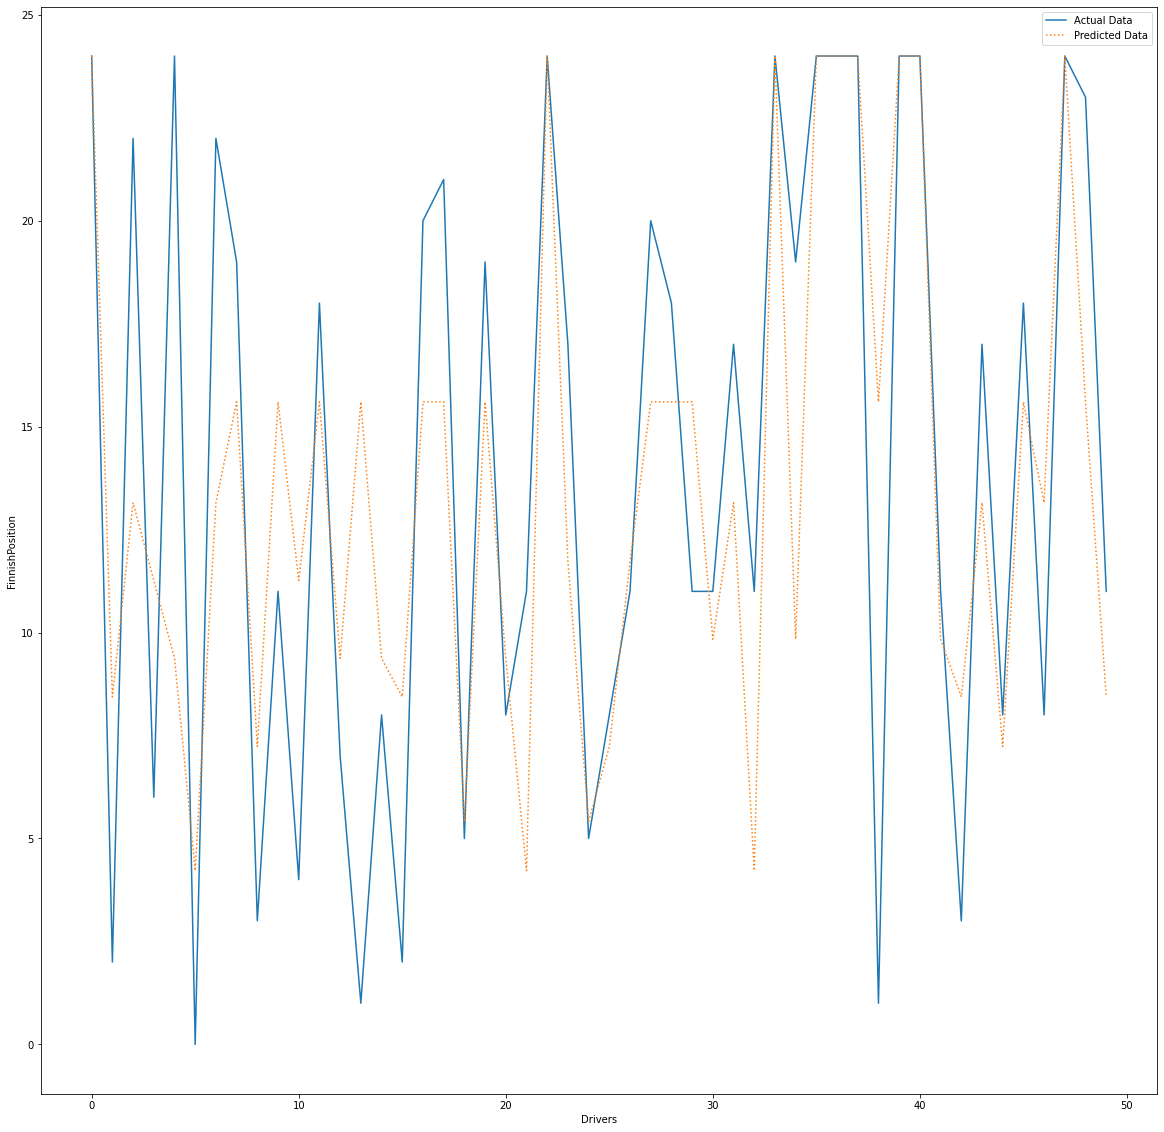

In [32]:
# visualising the first 50 rows of the data vs the predicted values

figGraph = plt.figure(figsize=(20, 20))

plt.plot([item for item in range(len(ytest[0:50]))], ytest.values[0:50], label="Actual Data")
plt.plot([item for item in range(len(ytest[0:50]))], y_pred_tree[0:50], label="Predicted Data", linestyle=':')
plt.ylabel("FinnishPosition")
plt.xlabel("Drivers")
plt.legend(loc='best')
plt.show()


Het opslaan van de grafiek

In [33]:
# saving the graph as a png file

figGraph.savefig("./Figures/predictionVSreality_graph.png")


De variable feature_names definieren als X om het te plotten in een decisiontree

In [34]:
# defining the variables for the tree

fn = list(X)


Het plotten van de tree

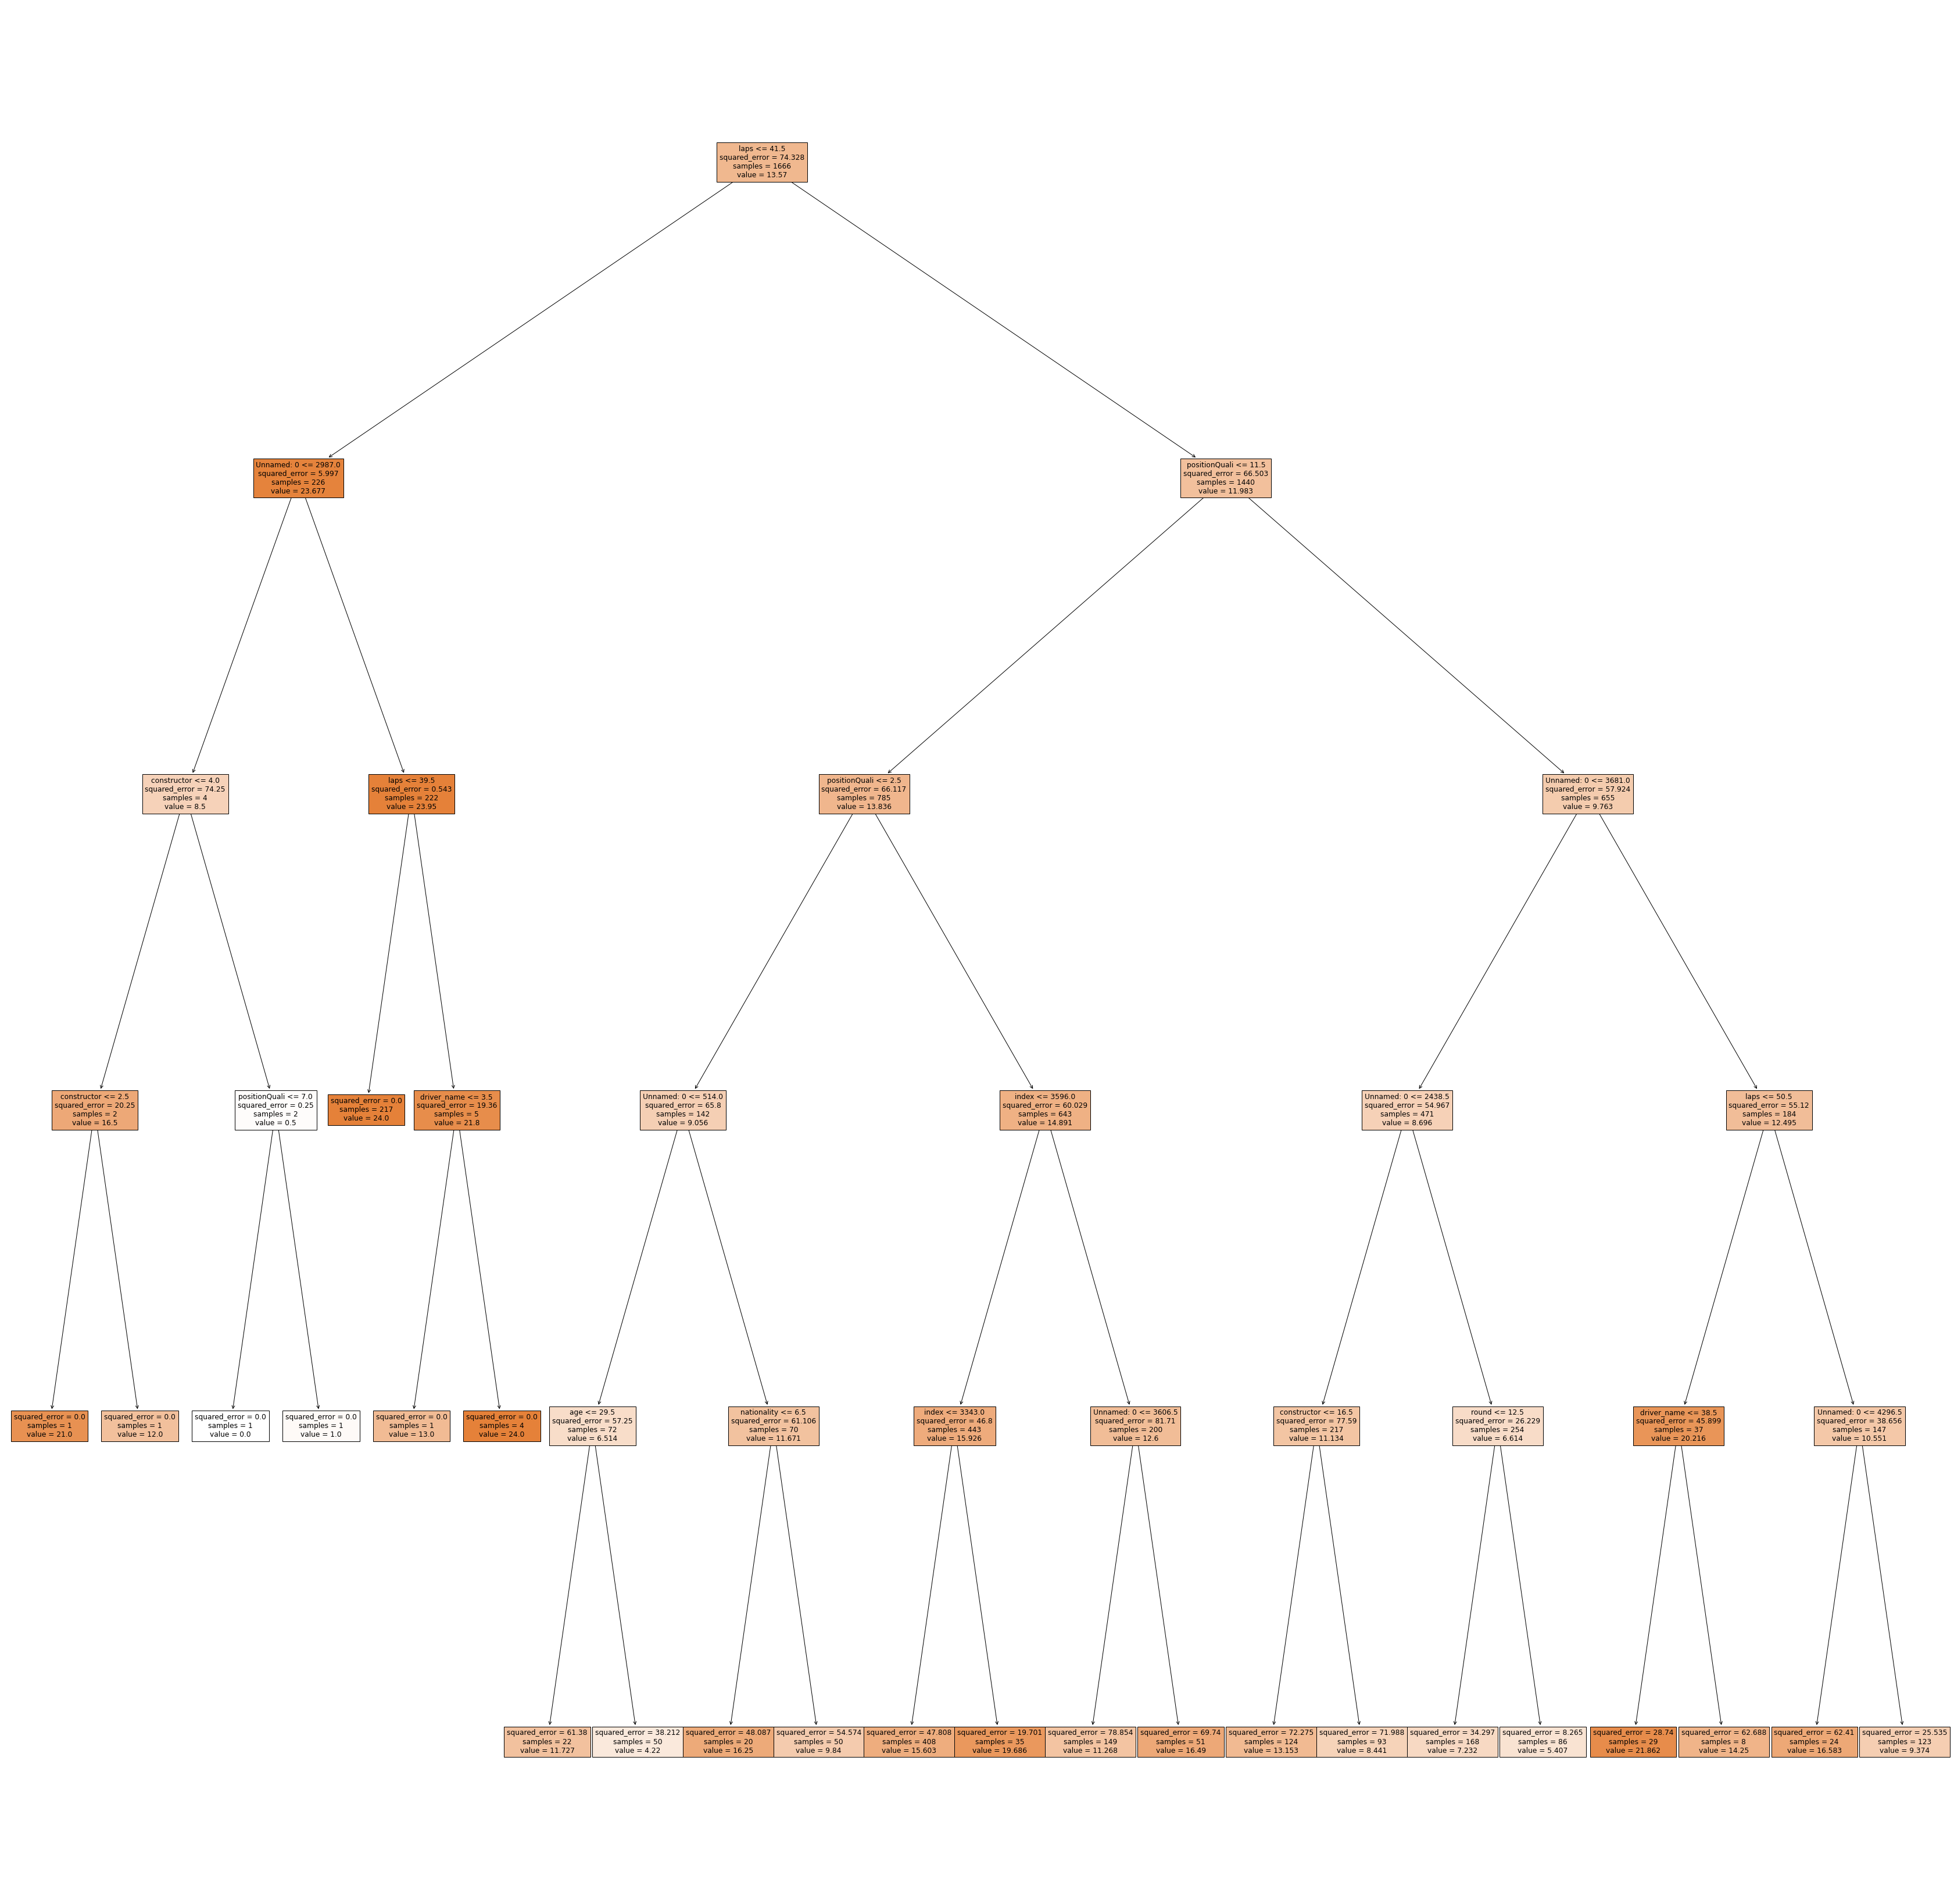

In [35]:
# creating the tree

treeFig = plt.figure(figsize=(60, 60))
_ = tree.plot_tree(model,
                   feature_names=fn,
                   filled=True)


Het opslaan van de geplotte tree

In [36]:
# saving the plotted tree as a png file

treeFig.savefig("./Figures/decision_tree.png")
